In [53]:
#pip install graphviz

In [54]:
#!pip install dtreeviz

In [55]:
#!pip install plotly

In [56]:
#!pip install Pillow

In [57]:
#!pip install pydot

In [58]:
#Import necessary libraries and load the dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pydot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
# Load the Titanic dataset
data = pd.read_csv('Titanic.csv')

In [4]:
#Preprocess the data

In [5]:
# Drop unnecessary columns or columns with too many missing values
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
# Handle missing values (e.g., fill with the median for numerical features, and the mode for categorical features)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [7]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
# Define the features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

In [9]:
#Split the data into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Create and train the Decision Tree Classifier

In [12]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [13]:
# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
#Make predictions and evaluate the model

In [15]:
# Make predictions on the test data
y_pred = clf.predict(X_test)


In [16]:
# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [17]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [18]:
#Visualize the Decision Tree

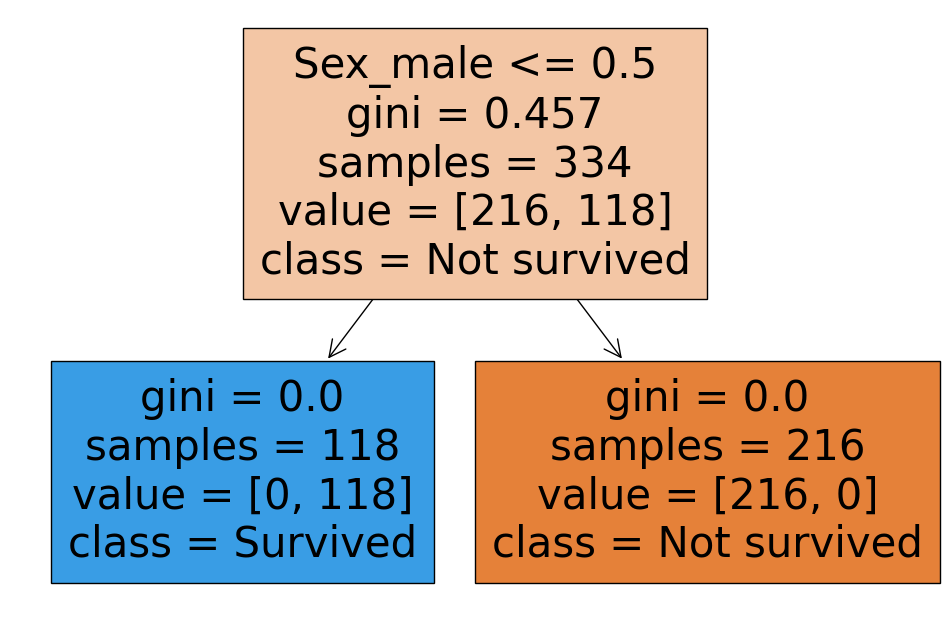

In [21]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['Not survived', 'Survived'])
plt.show()